# Proyek Analisis Data: [Air Quality](https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/edit)
- **Nama:** Muhammad Attan
- **Email:** 2022610013.attan@itp.ac.id
- **ID Dicoding:** attmhd

## Menentukan Pertanyaan Bisnis

- Apakah ada korelasi antara konsentrasi polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dengan faktor meteorologi seperti suhu, kelembaban, kecepatan angin, dan arah angin?
- Bagaimana tren perubahan polutan PM2.5, PM10, SO2, NO2, CO, dan O3?
- Berapa persentase kualitas udara  untuk ketiga station?
- Station mana yang tingkat polutannya tertinggi beserta tanggalnya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
autizhongxin = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
autizhongxin.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin


In [4]:
changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
dingling = pd.read_csv('data/PRSA_Data_Dingling_20130301-20170228.csv')
dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
columns = dingling.columns
column = []
for i in columns:
    column.append(i)
print(f"Kolom : {column}")


Kolom : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


**Penjelasan dataset:**
- Kolom (year, month, day, hour) merupakan tanggal pengukuran dilakukan.
- Kolom (PM2.5, PM10, SO2, NO2, CO, O3) merupakan parameter pengukur kualitas udara.
- Kolom (Temp) merupakan suhu saat pengukuran dilakukan.
- Kolom (Pres) merupakan tekanan udara saat pengukuran dilakukan.
- Kolom (Dewp) merupakan titik embun saat pengukuran dilakukan.
- Kolom (Rain) merupakan curah hujan saat pengukuran dilakukan.
- Kolom (WD) merupakan arah angin saat pengukuran dilakukan.
- Kolom (WSPM) merupakan kecepatan angin saat pengukuran dilakukan.
- Kolom (Station) merupakan nama station saat pengukuran dilakukan.

### Assessing Data

#### Menilai kolom `Aotizhonxin`

In [7]:
autizhongxin.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [8]:
#Cek tipe data
autizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
#cek data yang kosong
autizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [10]:
# cek data yang duplikat
print(f"Jumlah data yang duplikat : {autizhongxin.duplicated().sum()}") 

Jumlah data yang duplikat : 0


**Insight:**
- Terdapat **925** data yang kosong pada kolom PM2.5.
- Terdapat **718** data yang kosong pada kolom PM10.
- Terdapat **935** data yang kosong pada kolom SO2.
- Terdapat **1023** data yang kosong pada kolom NO2.
- Terdapat **1776** data yang kosong pada kolom CO.
- Terdapat **1719** data yang kosong pada kolom O3.
- Terdapat **20** data yang kosong pada kolom ( Temp, pres, dewp, rain).
- Terdapat **81** data yang kosong pada kolom Wd.
- Terdapat **14** data yang kosong pada kolom WSPM.
- Tidak ada data yang duplikat.

#### Menilai kolom `Changping`

In [11]:
changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [12]:
#Cek tipe data
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [13]:
#cek data yang kosong
changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [14]:
# cek data yang duplikat
print(f"Jumlah data yang duplikat : {changping.duplicated().sum()}") 


Jumlah data yang duplikat : 0


**Insight:**
- Terdapat **774** data yang kosong pada kolom PM2.5.
- Terdapat **582** data yang kosong pada kolom PM10.
- Terdapat **628** data yang kosong pada kolom SO2.
- Terdapat **667** data yang kosong pada kolom NO2.
- Terdapat **1521** data yang kosong pada kolom CO.
- Terdapat **604** data yang kosong pada kolom O3.
- Terdapat **53** data yang kosong pada kolom ( Temp,dewp).
- Terdapat **50** data yang kosong pada kolom Pres.
- Terdapat **51** data yang kosong pada kolom Rain.
- Terdapat **140** data yang kosong pada kolom Wd.
- Terdapat **43** data yang kosong pada kolom WSPM.
- Tidak ada data yang duplikat.

#### Menilai kolom `Dingling`

In [15]:
dingling.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [16]:
#Cek tipe data
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
#cek data yang kosong
dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [18]:
# cek data yang duplikat
print(f"Jumlah data yang duplikat : {dingling.duplicated().sum()}") 


Jumlah data yang duplikat : 0


**Insight:**
- Terdapat **779** data yang kosong pada kolom PM2.5.
- Terdapat **656** data yang kosong pada kolom PM10.
- Terdapat **730** data yang kosong pada kolom SO2.
- Terdapat **1234** data yang kosong pada kolom NO2.
- Terdapat **2012** data yang kosong pada kolom CO.
- Terdapat **1214** data yang kosong pada kolom O3.
- Terdapat **53** data yang kosong pada kolom ( Temp,dewp).
- Terdapat **50** data yang kosong pada kolom Pres.
- Terdapat **51** data yang kosong pada kolom Rain.
- Terdapat **140** data yang kosong pada kolom Wd.
- Terdapat **43** data yang kosong pada kolom WSPM.
- Tidak ada data yang duplikat.

### Cleaning Data

##### Autizhongxin

In [19]:
# cek jumlah baris sebelum di drop
before =  autizhongxin.shape[0]
before

35064

In [20]:
# cek jumlah baris data yang kosong sebelum di drop
autizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [21]:
# drop data yang kosong
autizhongxin.dropna(inplace=True)

In [22]:
# cek jumlah baris setelah di drop
autizhongxin.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [23]:
# cek jumlah baris setelah di drop
after =  autizhongxin.shape[0]
after

31815

In [24]:
print(f"Jumlah data yang di drop : {before - after}")

Jumlah data yang di drop : 3249


##### Changping

In [25]:
# cek jumlah baris sebelum di drop
before =  changping.shape[0]
before

35064

In [26]:
# cek jumlah baris data yang kosong sebelum di drop
changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [27]:
# drop data yang kosong
changping.dropna(inplace=True)

In [28]:
# cek jumlah baris setelah di drop
changping.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [29]:
# cek jumlah baris setelah di drop
after =  changping.shape[0]
after

32681

In [30]:
print(f"Jumlah data yang di drop : {before - after}")

Jumlah data yang di drop : 2383


##### Dingling

In [31]:
# cek jumlah baris sebelum di drop
before =  dingling.shape[0]
before

35064

In [32]:
# cek jumlah baris data yang kosong sebelum di drop
dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [33]:
# drop data yang kosong
dingling.dropna(inplace=True)

In [34]:
# cek jumlah baris setelah di drop
dingling.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [35]:
# cek jumlah baris setelah di drop
after =  dingling.shape[0]
after

31306

In [36]:
print(f"Jumlah data yang di drop : {before - after}")

Jumlah data yang di drop : 3758


**Insight:**
- Mengingat potensi ketidakvalidan data jika diisi ulang, saya memutuskan untuk drop data yang kosong. Hal ini dilakukan untuk menjaga akurasi hasil analisis dan menghindari bias dalam kesimpulan.

## Exploratory Data Analysis (EDA)

#### Menggabungkan data `Autizhongxing` , `Changping` dan `Dingling`

In [37]:
# gabungkan dataset
data = pd.merge(autizhongxin, changping, how='outer')
data = pd.merge(data, dingling, how='outer')
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
3,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
4,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping


In [38]:
# menghapus kolom no
data.drop('No', axis=1, inplace=True)

In [39]:
#  menggabungkan kolom year, month, dan day menjadi kolom Date
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.drop(['year', 'month', 'day'], axis=1, inplace=True)
data.head()

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01
1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
2,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01
3,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
4,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01


In [40]:
# memindahkan kolom date ke paling depan
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.head()

,Date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2013-03-01,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
3,2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
4,2013-03-01,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping


In [41]:
data.describe(include='all')

,Date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,95802,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802.000000,95802,95802.000000,95802
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205,NaN,32681
mean,2015-03-16 15:59:25.729316864,11.545218,72.906719,95.955614,14.742061,43.614551,1109.690789,60.961035,13.576376,1009.164614,1.922232,0.063766,NaN,1.812667,NaN
min,2013-03-01 00:00:00,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-04-03 00:00:00,6.000000,18.000000,32.000000,2.000000,17.000000,400.000000,16.000000,3.200000,1000.700000,-9.700000,0.000000,NaN,1.000000,NaN
50%,2015-03-22 00:00:00,12.000000,48.000000,72.000000,7.000000,35.000000,800.000000,51.000000,14.500000,1008.700000,2.300000,0.000000,NaN,1.500000,NaN
75%,2016-03-07 00:00:00,18.000000,102.000000,134.000000,18.000000,63.000000,1400.000000,85.000000,23.200000,1017.500000,14.600000,0.000000,NaN,2.300000,NaN
max,2017-02-28 00:00:00,23.000000,713.000000,992.000000,310.000000,290.000000,10000.000000,500.000000,41.400000,1042.000000,28.500000,52.100000,NaN,11.200000,NaN


In [42]:
# data min max pm2.5 masing masing stasiun 
data.groupby('station')['PM2.5'].agg(['min', 'max'])

,min,max
station,,
Aotizhongxin,3.0,713.0
Changping,3.0,662.0
Dingling,3.0,647.0


In [43]:
# data min max pm10 masing masing stasiun 
data.groupby('station')['PM10'].agg(['min', 'max'])

,min,max
station,,
Aotizhongxin,2.0,948.0
Changping,2.0,992.0
Dingling,2.0,905.0


In [44]:
# formula untuk menghitung AQI yang nilainya dengan format 0.2f

def aqi_formula(concentration, c_low, c_high, i_low, i_high):
    aqi = (((i_high - i_low) / (c_high - c_low)) * (concentration - c_low)) + i_low
    return aqi

# fungsi untuk menghitung AQI

def calculate_aqi(row):
    if row['PM2.5'] >= 0 and row['PM2.5'] <= 35:
        return aqi_formula(row['PM2.5'], 0, 35, 0, 50)
    elif row['PM2.5'] >= 36 and row['PM2.5'] <= 75:
        return aqi_formula(row['PM2.5'], 36, 75, 51, 100)
    elif row['PM2.5'] >= 76 and row['PM2.5'] <= 115:
        return aqi_formula(row['PM2.5'], 76, 115, 101, 150)
    elif row['PM2.5'] >= 116 and row['PM2.5'] <= 150:
        return aqi_formula(row['PM2.5'], 116, 150, 151, 200)
    elif row['PM2.5'] >= 151 and row['PM2.5'] <= 250:
        return aqi_formula(row['PM2.5'], 151, 250, 201, 300)
    elif row['PM2.5'] >= 251 and row['PM2.5'] <= 500:
        return aqi_formula(row['PM2.5'], 251, 500, 301, 500)
    else:
        return 501
    
# hitung AQI
data['AQI'] = data.apply(calculate_aqi, axis=1)

# formula hitung kategori AQI
def aqi_category(aqi):
    if aqi >= 0 and aqi <= 50:
        return 'Excellent'
    elif aqi >= 51 and aqi <= 100:
        return 'Good'
    elif aqi >= 101 and aqi <= 150:
        return 'Lightly Polluted'
    elif aqi >= 151 and aqi <= 200:
        return 'Moderately Polluted'
    elif aqi >= 201 and aqi <= 300:
        return 'Heavily Polluted'
    elif aqi >= 301 and aqi <= 500:
        return 'Severely Polluted'
    else:
        return 'Hazardous'
    
# hitung kategori AQI
data['AQI Category'] = data['AQI'].apply(aqi_category)


Perhitungan AQI China based on [artikel](https://healthandsafetyinshanghai.com/china-air-quality/#:~:text=The%20China%20AQI%20standard%20is,concentration%20exceeds%20150%20ug%2Fm3.)

In [45]:
# rubah data aqi menjadi bilangan bulat
data['AQI'] = data['AQI'].astype(int)

In [46]:
data.head()

,Date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,AQI Category
0,2013-03-01,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,4,Excellent
1,2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,5,Excellent
2,2013-03-01,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,4,Excellent
3,2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,11,Excellent
4,2013-03-01,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,4,Excellent


In [47]:
# # export data ke csv
# data.to_csv('dashboard/data.csv', index=False)

**Insight:**
- Penggabungan data menggunakan metode outer untuk menjaga keutuhan data
- Penambahan kolom AQI Level untuk mengklasifikasi kualitas udara berdasarkan pada nilai PM2.5 [sesuai dengan standar yang berlaku di China]

## Visualization & Explanatory Analysis

### Apakah ada korelasi antara konsentrasi polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dengan faktor meteorologi seperti suhu, kelembaban, kecepatan angin, dan arah angin?

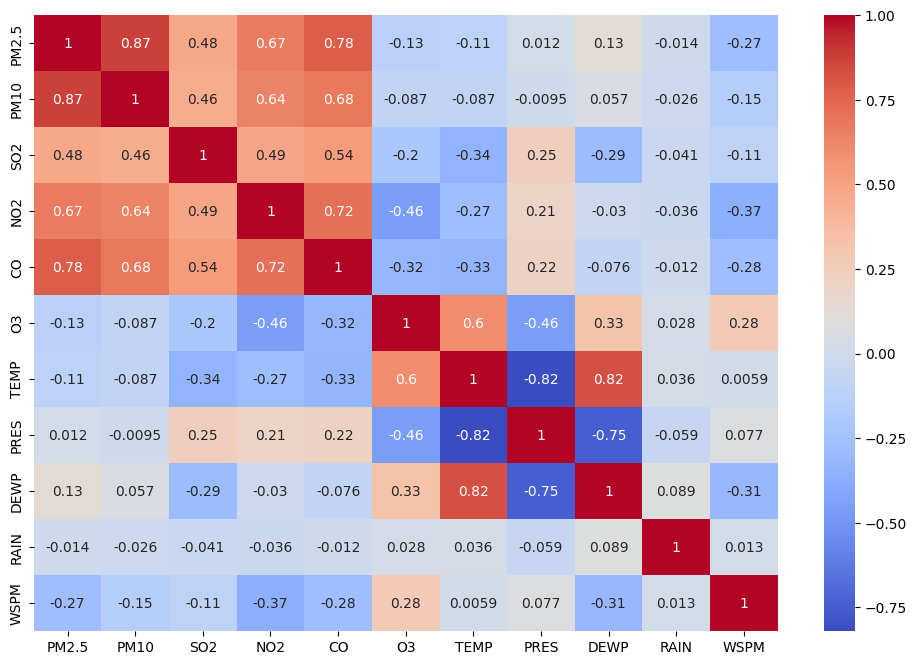

In [48]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
metereologi = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# cek korelasi data
data_korelasi = data[polutan + metereologi]

# heatmap korelasi data
plt.figure(figsize=(12, 8))
sns.heatmap(data_korelasi.corr(), annot=True, cmap='coolwarm')
plt.show()

### Bagaimana tren perubahan polutan PM2.5?

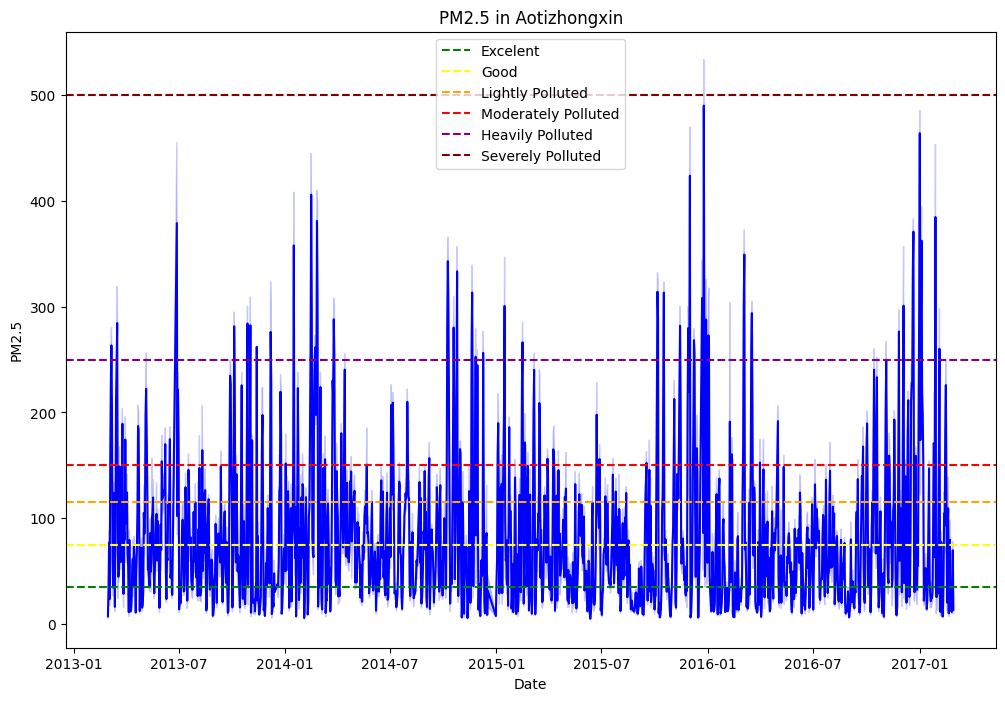

In [49]:
# data aotizhongxin
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='PM2.5', data=data[data['station'] == 'Aotizhongxin'], color='blue')
plt.axhline(y=35, color='green', linestyle='--', label='Excelent')
plt.axhline(y=75, color='yellow', linestyle='--', label='Good')
plt.axhline(y=115, color='orange', linestyle='--', label='Lightly Polluted')
plt.axhline(y=150, color='red', linestyle='--', label='Moderately Polluted')
plt.axhline(y=250, color='purple', linestyle='--', label='Heavily Polluted')
plt.axhline(y=500, color='maroon', linestyle='--', label='Severely Polluted')
plt.legend()
plt.title('PM2.5 in Aotizhongxin')
plt.show()

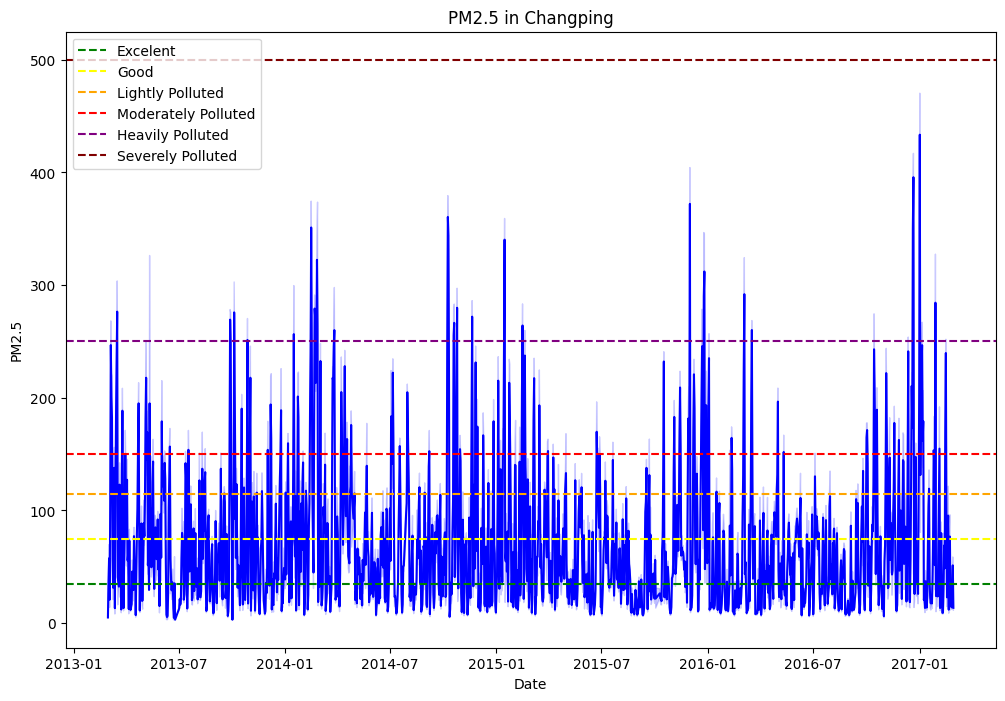

In [50]:
# data changping
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='PM2.5', data=data[data['station'] == 'Changping'], color='blue')
plt.axhline(y=35, color='green', linestyle='--', label='Excelent')
plt.axhline(y=75, color='yellow', linestyle='--', label='Good')
plt.axhline(y=115, color='orange', linestyle='--', label='Lightly Polluted')
plt.axhline(y=150, color='red', linestyle='--', label='Moderately Polluted')
plt.axhline(y=250, color='purple', linestyle='--', label='Heavily Polluted')
plt.axhline(y=500, color='maroon', linestyle='--', label='Severely Polluted')
plt.legend()
plt.title('PM2.5 in Changping')
plt.show()

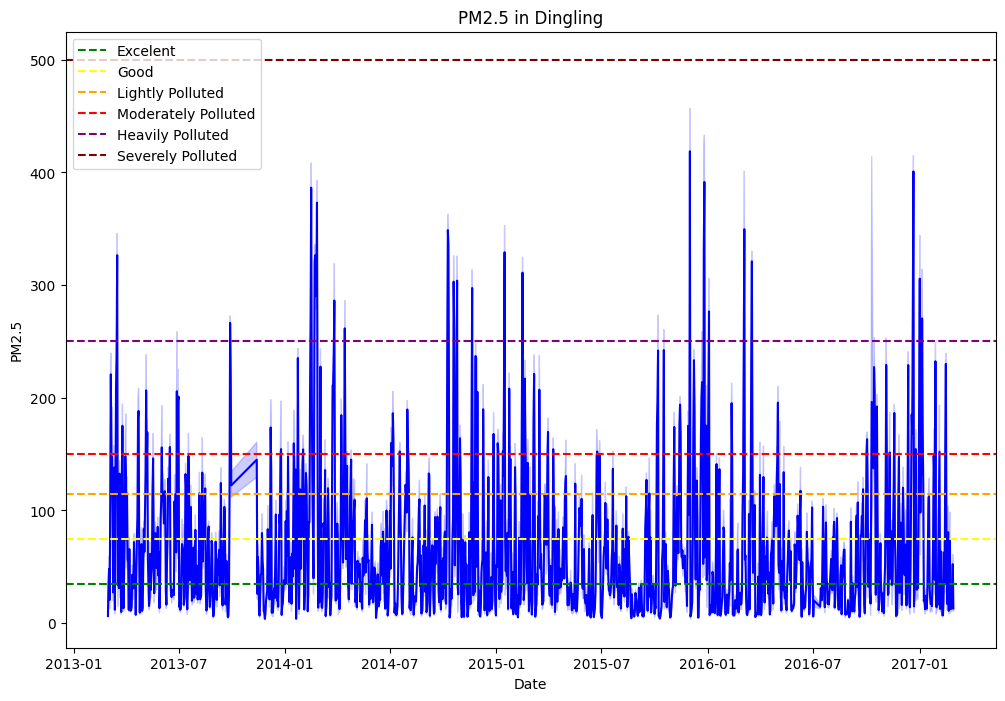

In [51]:
# data Dingling
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='PM2.5', data=data[data['station'] == 'Dingling'], color='blue')
plt.axhline(y=35, color='green', linestyle='--', label='Excelent')
plt.axhline(y=75, color='yellow', linestyle='--', label='Good')
plt.axhline(y=115, color='orange', linestyle='--', label='Lightly Polluted')
plt.axhline(y=150, color='red', linestyle='--', label='Moderately Polluted')
plt.axhline(y=250, color='purple', linestyle='--', label='Heavily Polluted')
plt.axhline(y=500, color='maroon', linestyle='--', label='Severely Polluted')
plt.legend()
plt.title('PM2.5 in Dingling')
plt.show()

In [52]:
print(f'Rata rata nilai polutan PM2.5 yaitu : {data['PM2.5'].mean()}')

Rata rata nilai polutan PM2.5 yaitu : 72.9067190664078


### Berapa persentase kualitas udara  untuk ketiga station?

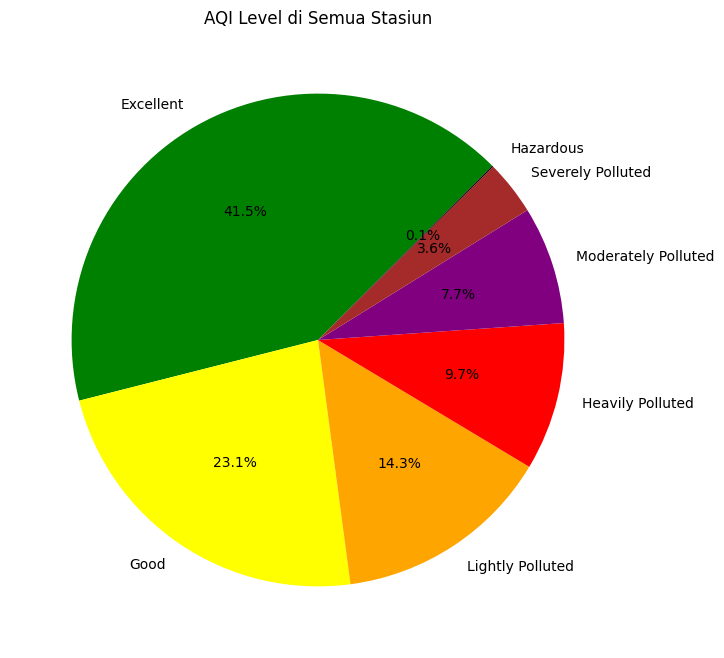

In [53]:
# AQI level di semua stasiun dengan pie chart
plt.figure(figsize=(12, 8))
data['AQI Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=45, colors=['green', 'yellow', 'orange', 'red', 'purple', 'brown','black'])
plt.title('AQI Level di Semua Stasiun')
plt.ylabel('')
plt.show()


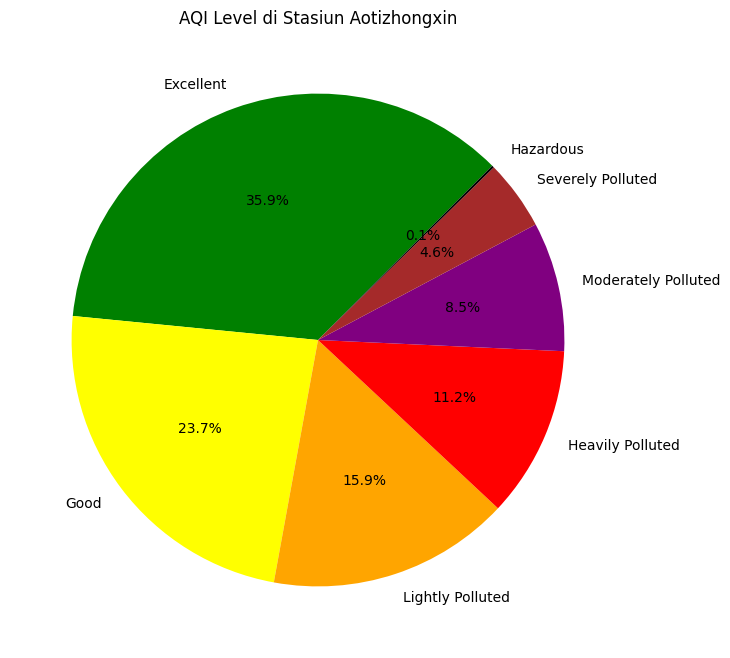

In [54]:
# AQI level di stasiun Aotizhongxin
plt.figure(figsize=(12, 8))
data[data['station'] == 'Aotizhongxin']['AQI Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=45, colors=['green', 'yellow', 'orange', 'red', 'purple', 'brown', 'black'])
plt.title('AQI Level di Stasiun Aotizhongxin')
plt.ylabel('')
plt.show()

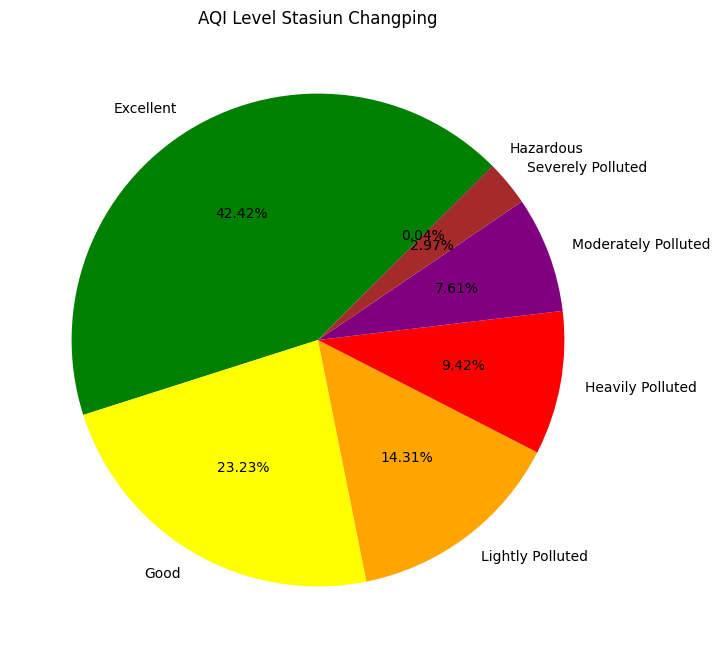

In [55]:
# AQI level di stasiun Changping
plt.figure(figsize=(12, 8))
data[data['station'] == 'Changping']['AQI Category'].value_counts().plot.pie(autopct='%1.2f%%', startangle=45, colors=['green','yellow','orange','red','purple','brown','black'])

plt.title('AQI Level Stasiun Changping')
plt.ylabel('')
plt.show()

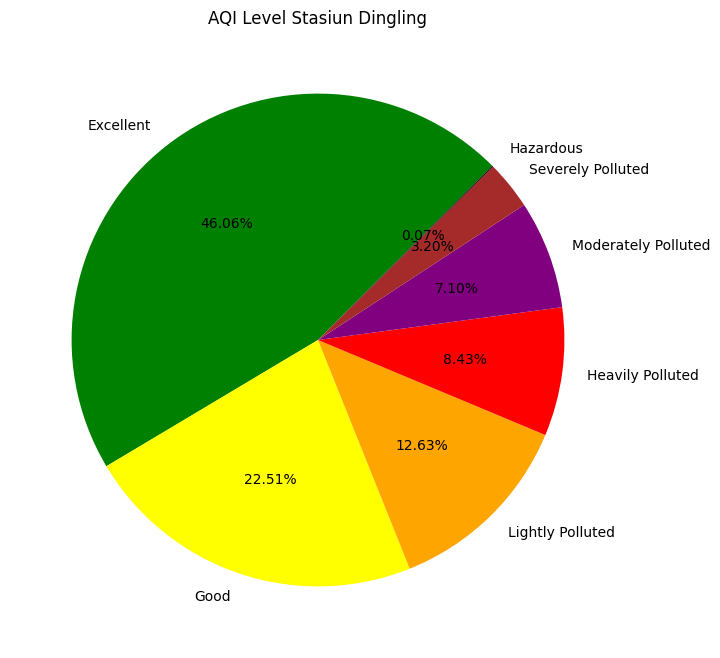

In [56]:
# AQI level di stasiun Changping
plt.figure(figsize=(12, 8))
data[data['station'] == 'Dingling']['AQI Category'].value_counts().plot.pie(autopct='%1.2f%%', startangle=45, colors=['green','yellow','orange','red','purple','brown','black'])

plt.title('AQI Level Stasiun Dingling')
plt.ylabel('')
plt.show()

### Station mana yang tingkat polutannya tertinggi beserta tanggalnya?

In [57]:
data[data['PM2.5'] == data['PM2.5'].max()][['Date','hour', 'station', 'PM2.5', 'AQI Category']]


,Date,hour,station,PM2.5,AQI Category
69879,2016-02-08,3,Aotizhongxin,713.0,Hazardous
93579,2017-01-28,5,Aotizhongxin,713.0,Hazardous


## Conclusion

* Dari Pertanyaan pertama dapat disimpulkan bahwa rata rata tidak terdapat korelasi antara polutan udara dengan faktor meteorologi dimana data yang ditunjukkan cenderung mendekati nol.
* Dari Pertanyaan Kedua dapat diambil kesimpulan bahwa :
    * Kualitas udara tidak stabil dengan fluktuasi yang cukup besar.
    * Tingkat polusi PM2.5 di Aotizhongxin cenderung meningkat dari tahun ke tahun, menunjukkan adanya permasalahan kualitas udara yang serius.
    * Secara keseluruhan stasiun kualitas udara masih dalam keadaan baik, ini ditarik dari data rata-rata PM2.5
* Dari Pertanyaan Ketiga dapat diambil kesimpulan bahwa kualitas udara masih aman untuk AQI Level Good, tapi ada beberapa data yang kualitas udara nya yang cukup mengkhawatirkan.
* Dari Pertanyaan keempat dapat diambil kesimpulan bahwa stasiun dengan tingkat polutan PM2.5 tertinggi tercatat terjadi 2 kali di stasiun Aotizhongxin dengan nilai PM2.5 713 pada tanggal 8 Februari 2016 dan 28 Januari 2017.